# Stochastic Calculus: An Introduction with Applications
## Week 1: Martingales in Discrete Time Pt 1

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd

### C2: Simulating Simple Symmetric Random Walk and Martingale Checks

#### C2 a) Generate an array of independent +- 1 steps and compute the partial sums

In [2]:
n_steps = 1000

In [3]:
# generate an array of +- 1 stepswith N=1000
probability_directions = np.random.binomial(1,0.5,n_steps)
direction_values = np.where(probability_directions==0,-1,1)
direction_values[0:5]

array([-1,  1,  1,  1, -1])

first 5 outcomes [-1  0  1  2  1]


Text(0, 0.5, 'Value')

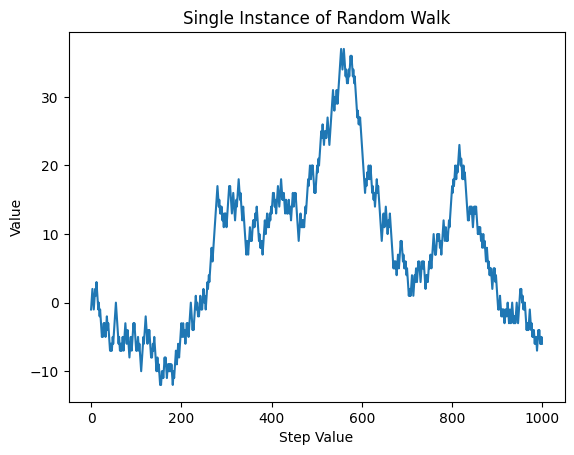

In [4]:
# let's visualize the different steps for just one pull
cumulative_sum = np.cumsum(direction_values)
print(f'first 5 outcomes {cumulative_sum[0:5]}')
plt.plot(cumulative_sum)
plt.title('Single Instance of Random Walk')
plt.xlabel('Step Value')
plt.ylabel('Value')

#### Extended to multiple steps using Monte Carlo Simulation

In [5]:
n_simulations = 1000
replications_values = []
for replication in range(n_simulations):
    probability_directions = np.random.binomial(1,0.5,n_steps)
    direction_values = np.where(probability_directions==0,-1,1)
    replications_values.append(direction_values)

Text(0, 0.5, 'Value')

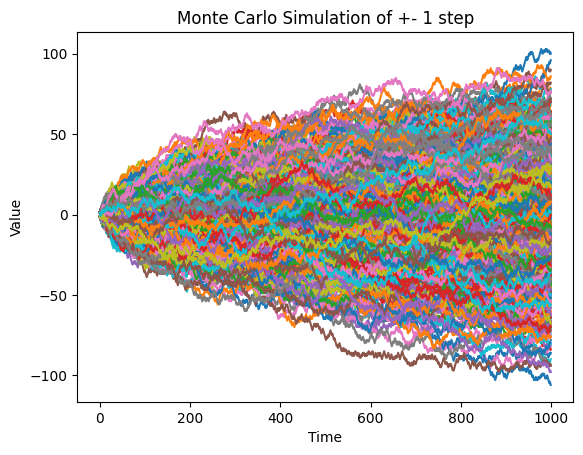

In [6]:
cumsum_replications_values = np.cumsum(replications_values,axis=1)
final_values = []

for i in range(n_simulations):
    plt.plot(cumsum_replications_values[i])
    final_values.append(cumsum_replications_values[i][-1])
plt.title('Monte Carlo Simulation of +- 1 step')
plt.xlabel('Time')
plt.ylabel('Value')

Text(0, 0.5, 'Frequency (out of 1000)')

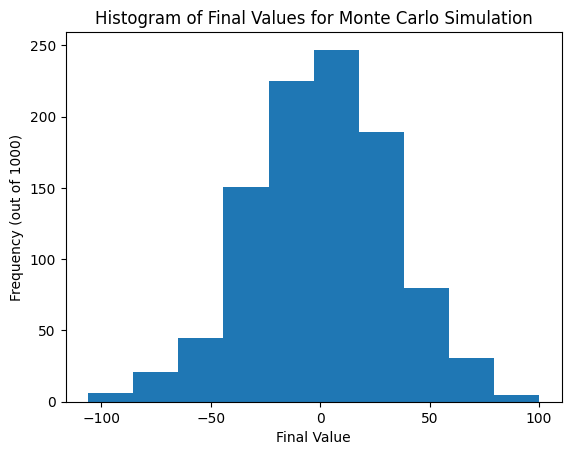

In [7]:
plt.hist(final_values)
plt.title('Histogram of Final Values for Monte Carlo Simulation')
plt.xlabel('Final Value')
plt.ylabel('Frequency (out of 1000)')

In [8]:
sqrt_n = np.sqrt(n_steps)
for i in range(3):
    clt_check = np.abs(final_values) <= (i+1)*sqrt_n
    clt_ratio = clt_check.sum()/len(final_values)
    print(f'Pct of values inside {i+1} std {clt_ratio}')

Pct of values inside 1 std 0.679
Pct of values inside 2 std 0.945
Pct of values inside 3 std 0.996


This highlights that as n goes to infinity we converge to the CLT. The cone of the monte carlo simulations results as depicted in the histogram showcase that the cone grows with sqrt(n) as its standard error.

#### C2 b) Compute and plot the running averages

In [9]:
single_directional_values = replications_values[0]
cumsum_single_directional_values = np.cumsum(single_directional_values)

Text(0, 0.5, 'Moving Average Value')

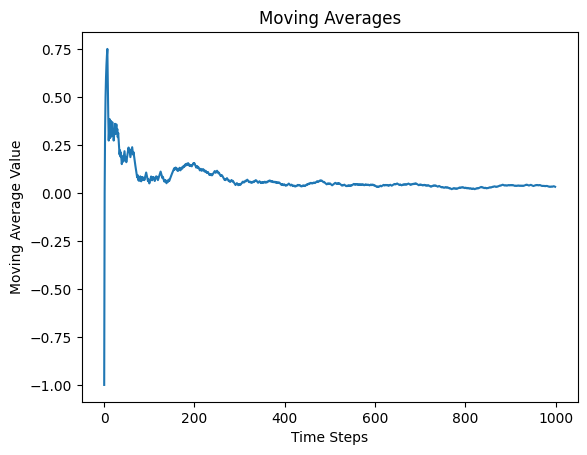

In [10]:
moving_averages = cumsum_single_directional_values / np.arange(1,n_steps+1)
plt.plot(moving_averages)
plt.title('Moving Averages')
plt.xlabel('Time Steps')
plt.ylabel('Moving Average Value')

The moving averages converge to 0.

#### Monte Carlo Simulation Running Averages

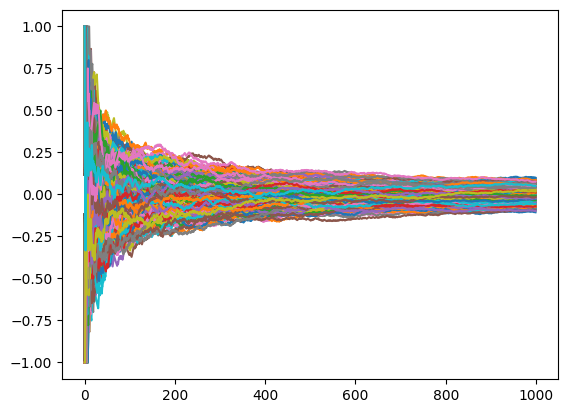

In [11]:
moving_averages_replications_final_values = []
moving_averages_lists = cumsum_replications_values / np.arange(1,n_steps+1)
for replication in range(n_simulations):
    moving_averages_replications_final_values.append(moving_averages_lists[replication][-1])
    plt.plot(moving_averages_lists[replication])

Text(0, 0.5, 'Frequency')

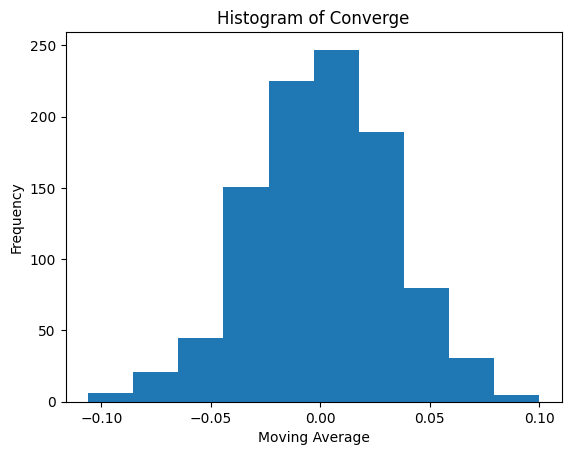

In [12]:
plt.hist(moving_averages_replications_final_values)
plt.title('Histogram of Converge')
plt.xlabel('Moving Average')
plt.ylabel('Frequency')

Using the monte carlo simulation it is clear that there is a funnel of convergence. With almost all values within 0.1 of of 0.

### C2 c) Estimate numerically the conditional expectation E[Sn+1 − Sn | Fn] by grouping
together paths that share the same Sn. Verify empirically that it is approximately
zero, supporting the martingale property.

In [13]:
# first we need to find the paths that have the same path at Sn
# pick a random time step
time_step = 35
values_time_step_35 = cumsum_replications_values[:,35]
values_time_step_36 = cumsum_replications_values[:,36]

n_simulations_values_df = pd.DataFrame({'n_35_price':values_time_step_35,'n_36_price':values_time_step_36})
n_simulations_values_df

,n_35_price,n_36_price
0,8,7
1,-4,-5
2,-2,-3
3,-4,-3
4,0,1
...,...,...
995,-4,-3
996,2,1
997,8,9
998,-8,-9


In [14]:
grouped_replications = n_simulations_values_df.groupby('n_35_price') # group by price at time step 35
n_simulations_values_df["direction"] = n_simulations_values_df["n_36_price"] - n_simulations_values_df["n_35_price"] # get the difference from the next time step to the current
avg_direction = grouped_replications["direction"].mean() # get the average dependent on the time at time step 35
avg_direction

n_35_price
-20   -1.000000
-18   -1.000000
-16   -0.333333
-14   -0.666667
-12    0.230769
-10   -0.052632
-8     0.213115
-6     0.000000
-4     0.085714
-2     0.050000
 0    -0.210526
 2     0.030769
 4    -0.009174
 6    -0.015385
 8    -0.166667
 10    0.000000
 12    0.100000
 14    0.500000
 16   -0.333333
 18   -1.000000
Name: direction, dtype: float64

In [15]:
# get the average of these movements as the expectation
expectation_next_price_given_current_price = np.mean(avg_direction)
expectation_next_price_given_current_price

np.float64(-0.17886746603484777)